<a href="https://colab.research.google.com/github/adammoss/python-demo/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First import relevant modules

In [0]:
# Openpyxl (Excel library)
from openpyxl import load_workbook

In [0]:
# Pandas (data analysis library)
import pandas as pd

In [0]:
# Matplotlib (plotting library)
import matplotlib.pyplot as plt

In [0]:
# File input/output
import os
from io import BytesIO
import urllib

In [0]:
# Location of sample Excel file (movie data from 1900's)
url = 'https://raw.github.com/adammoss/python-demo/master/movies.xlsx'

The following code shows the Excel file being read into the python Pandas data analysis library 

In [0]:
# Read into Pandas dataframe
df = pd.read_excel(url)

In [0]:
# Create new column
df['Net Profit'] = df['Gross Earnings'] - df['Budget']

In [176]:
# Return head of dataframe
df.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Net Profit
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204,436,22,9.0,481,691,1,10718,88,69.0,8.0,NaN
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0,2,2,0.0,4,0,1,5,1,1.0,4.8,2900000.0
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54,81,12,6.0,108,226,0,4849,45,48.0,8.3,NaN
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756,136,23,18.0,203,12000,1,111841,413,260.0,8.3,-5973565.0
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21,426,20,3.0,455,926,1,7431,84,71.0,8.0,NaN


In [177]:
# Get summary statistics
df.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Net Profit
count,1338.000000,1338.000000,1308.000000,1.281000e+03,1.086000e+03,1338.000000,1338.000000,1338.000000,1336.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1338.000000,1335.000000,1338.000000,1.052000e+03
mean,1987.289985,113.071001,1.987752,2.712064e+07,4.752741e+07,1026.567265,5255.186846,1227.041106,456.738772,7673.354260,2656.870703,1.167414,8.538817e+04,255.183857,85.108614,6.702167,1.696906e+07
std,14.124870,27.434048,0.310047,8.466937e+07,6.113161e+07,3446.329257,8652.096738,2891.932284,880.031542,11055.985788,7446.142461,1.608806,1.560198e+05,343.287920,62.040982,1.066497,1.073165e+08
min,1916.000000,25.000000,1.180000,7.000000e+03,5.494000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,2.300000,-2.397702e+09
25%,1982.000000,96.000000,1.850000,4.000000e+06,8.182800e+06,6.000000,605.000000,273.000000,136.000000,1412.000000,0.000000,0.000000,9.905500e+03,77.250000,39.000000,6.100000,-5.962732e+06
50%,1993.000000,107.000000,1.850000,1.400000e+07,2.724075e+07,56.500000,925.500000,559.000000,324.000000,2660.000000,17.500000,1.000000,3.370500e+04,159.000000,71.000000,6.800000,6.608922e+06
75%,1997.000000,123.000000,2.350000,3.300000e+07,6.358500e+07,272.000000,10000.000000,849.000000,586.500000,11937.750000,812.000000,2.000000,9.031425e+04,306.750000,118.000000,7.400000,3.220644e+07
max,1999.000000,330.000000,2.760000,2.400000e+09,6.586723e+08,21000.000000,49000.000000,29000.000000,13000.000000,74382.000000,108000.000000,15.000000,1.689764e+06,4144.000000,392.000000,9.300000,4.586723e+08


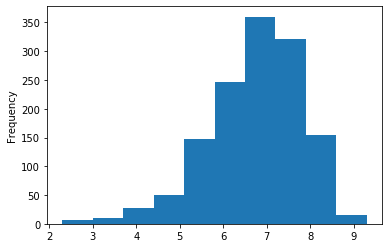

In [178]:
# Plot histogram of IMDB score
df['IMDB Score'].plot(kind="hist")
plt.show()

In [0]:
# Create pivot table using year
table = pd.pivot_table(df, index='Year').reset_index('Year')

In [180]:
table.head()

,Year,Aspect Ratio,Budget,Duration,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - Director,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,Gross Earnings,IMDB Score,Net Profit,Reviews by Crtiics,Reviews by Users,User Votes
0,1916,1.33,385907.0,123.0,436.0,22.0,9.0,204.0,481.0,691.0,1.0,NaN,8.00,NaN,69.0,88.0,10718.0
1,1920,1.33,100000.0,110.0,2.0,2.0,0.0,0.0,4.0,0.0,1.0,3000000.0,4.80,2900000.0,1.0,1.0,5.0
2,1925,1.33,245000.0,151.0,81.0,12.0,6.0,54.0,108.0,226.0,0.0,NaN,8.30,NaN,48.0,45.0,4849.0
3,1927,1.33,6000000.0,145.0,136.0,23.0,18.0,756.0,203.0,12000.0,1.0,26435.0,8.30,-5973565.0,260.0,413.0,111841.0
4,1929,1.35,379000.0,105.0,251.5,24.0,3.5,12.5,282.0,546.5,4.5,1408975.0,7.15,2429000.0,53.5,77.5,5988.5


Text(0, 0.5, 'IMDB Score')

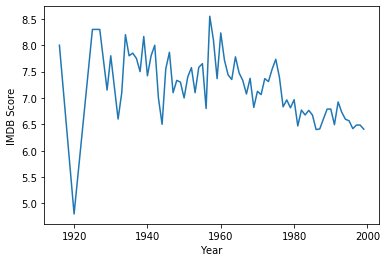

In [181]:
# Plot average IMDB rating as a function of year
plt.plot(table['Year'], table['IMDB Score'])
plt.xlabel('Year')
plt.ylabel('IMDB Score')

Text(0, 0.5, 'Net Profit')

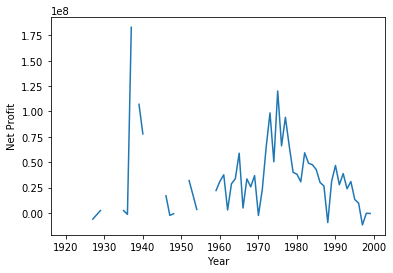

In [182]:
# Plot average IMDB rating as a function of year
plt.plot(table['Year'], table['Net Profit'])
plt.xlabel('Year')
plt.ylabel('Net Profit')

The following code shows the Excel file being read into the python openpyxl Excel library



In [0]:
# Load Excel workbook
wb = load_workbook(BytesIO(urllib.request.urlopen(url).read()))


In [0]:
# Get the active sheet
ws = wb.active

In [0]:
# Save workbook
wb.save('movies_edit.xlsx')


In [186]:
# Check new file created
os.listdir('.')


['.config', 'movies_edit.xlsx', 'balances.xlsx', 'sample_data']

In [187]:
# Read new workbook into Pandas to show edits 
df = pd.read_excel('movies_edit.xlsx')
df.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21,426,20,3.0,455,926,1,7431,84,71.0,8.0
